In [2]:
import numpy as np
import pandas as pd

import scipy.stats

import sys
import os

sys.path.append('../lib')
from Dab import Dab
from Gmt import read_gmt

import itertools

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
def get_linear_weights(dab):
    N = len(dab.genes)
    lin = np.zeros((N*(N-1))/2, dtype=np.float64)
    cur_idx = 0
    for i in range(N-1):
        lin[cur_idx:cur_idx+N-i-1] = dab.weights[i, i+1:N]
        cur_idx += N-i-1
    return lin

In [5]:
stat = {'file':[], 'deviation':[], 'mean':[], 'min':[], 'min_count':[], 'max':[], 'max_count': [],
             'p_20':[], 'p_40':[], 'p_60':[], 'p_80':[], 'p_95':[], 'p_99':[], 'p_999':[]}

base_dir = '/Users/ben/Documents/IW Networks/r04/'
for f in ['global.dab', 'heart.dab', 'liver.dab', 'lung.dab', 'brain.dab']:
    print "Working on %s" % f
    d = Dab(base_dir + f)
    l = get_linear_weights(d)
    d = None
    stat['file'].append(f)
    stat['deviation'].append(l.std())
    stat['mean'].append(l.mean())
    minimum = np.nanmin(l)
    stat['min'].append(minimum)
    stat['min_count'].append((l == minimum).sum())
    maximum = np.nanmax(l)
    stat['max'].append(maximum)
    stat['max_count'].append((l == maximum).sum())
    percentiles = np.percentile(l, [20,40,60,80,95,99,99.9])
    stat['p_20'].append(percentiles[0])
    stat['p_40'].append(percentiles[1])
    stat['p_60'].append(percentiles[2])
    stat['p_80'].append(percentiles[3])
    stat['p_95'].append(percentiles[4])
    stat['p_99'].append(percentiles[5])
    stat['p_999'].append(percentiles[6])
    

Working on global.dab
Working on heart.dab
Working on liver.dab
Working on lung.dab
Working on brain.dab


In [27]:
pd.DataFrame(stat, columns=['file', 'deviation', 'mean', 'min', 'min_count', 'max', 'max_count', 'p_20', 'p_40',
                           'p_60', 'p_80', 'p_95', 'p_99', 'p_999'])

file  deviation      mean       min  min_count       max  max_count  \
0  global.dab   0.010778  0.007241  0.000004          1  0.999990          1   
1   heart.dab   0.004147  0.005964  0.000012          1  0.890534          1   
2   liver.dab   0.004249  0.005844  0.000008          1  0.918758          1   
3    lung.dab   0.004368  0.005994  0.000017          1  0.939896          1   
4   brain.dab   0.004038  0.007151  0.000042          1  0.805511          1   

       p_20      p_40      p_60      p_80      p_95      p_99     p_999  
0  0.003021  0.005565  0.008545  0.010000  0.010751  0.024566  0.115991  
1  0.002012  0.004140  0.007855  0.009939  0.010188  0.013329  0.032329  
2  0.001810  0.003926  0.007788  0.009936  0.010178  0.012814  0.031735  
3  0.002080  0.004140  0.007790  0.009895  0.010185  0.013445  0.035957  
4  0.003790  0.006186  0.009004  0.010000  0.010562  0.015835  0.039807

In [7]:
#Functions for histogram plotting
def get_edge_hist(d, bins=100, range=None, title="Edge Weight Histogram"):
    N = len(d.genes)
    #Make a single array with each edge weight in it once
    all_edges = np.empty((N*(N-1))/2, dtype=np.float32)
    curidx = 0
    for i in xrange(N-1):
        all_edges[curidx:(curidx+N-i-1)] = d.weights[i, i+1:N]
        curidx += N-i-1
    #Do plotting
    plt.hist(all_edges, bins=bins, range=range, log=True)
    plt.xlabel('Score')
    plt.ylabel('Edge Count')
    plt.title(title)

def get_degree_hist(d, bins=100, range=None, title="Gene Degree Histogram"):
    N = len(d.genes)
    for i in xrange(N):
        d.weights[i,i] = 0
    degrees = d.weights.sum(axis=1)
    #Do plotting
    plt.hist(degrees, bins=bins, range=range, log=True)
    plt.xlabel('Degree')
    plt.ylabel('Gene Count')
    plt.title(title)

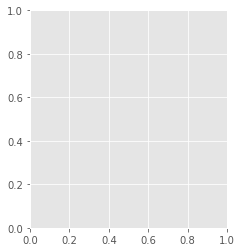

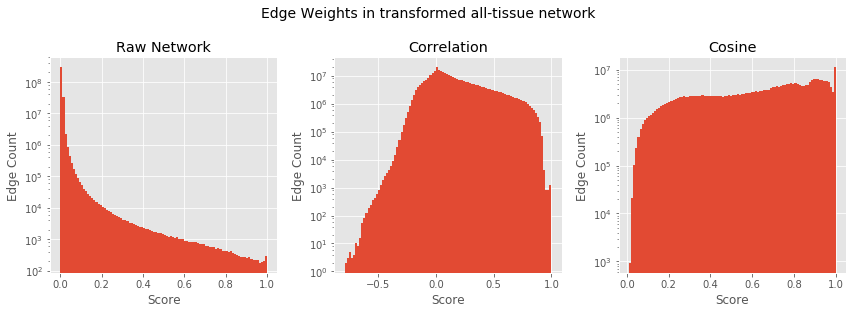

In [8]:
#Making Figure 1
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
d = Dab(base_dir + 'global.dab')
get_edge_hist(d, title="Raw Network")

plt.subplot(1,3,2)
d = Dab(base_dir + 'global.dab.cor')
get_edge_hist(d, title="Correlation")

plt.subplot(1,3,3)
d = Dab(base_dir + 'global.dab.cosine')
get_edge_hist(d, title="Cosine")

plt.suptitle("Edge Weights in transformed all-tissue network", fontsize=14, y=1.08)
plt.tight_layout()
plt.show()

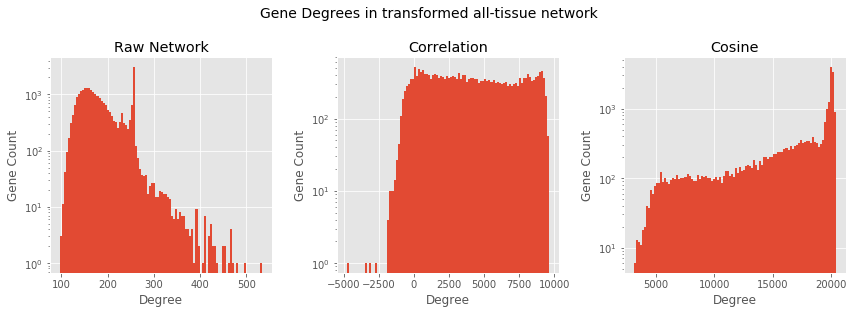

In [9]:
#Making Figure 2
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
d = Dab(base_dir + 'global.dab')
get_degree_hist(d, title="Raw Network")

plt.subplot(1,3,2)
d = Dab(base_dir + 'global.dab.cor')
get_degree_hist(d, title="Correlation")

plt.subplot(1,3,3)
d = Dab(base_dir + 'global.dab.cosine')
get_degree_hist(d, title="Cosine")

plt.suptitle("Gene Degrees in transformed all-tissue network", fontsize=14, y=1.08)
plt.tight_layout()
plt.show()

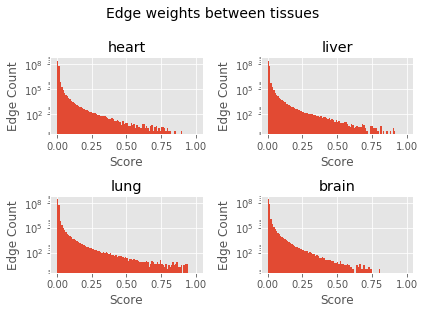

In [11]:
#Making Figure 3
plt.subplot(2,2,1)
d = Dab(base_dir + 'heart.dab')
get_edge_hist(d, title="heart", range=(0,1))

plt.subplot(2,2,2)
d = Dab(base_dir + 'liver.dab')
get_edge_hist(d, title="liver", range=(0,1))

plt.subplot(2,2,3)
d = Dab(base_dir + 'lung.dab')
get_edge_hist(d, title="lung", range=(0,1))

plt.subplot(2,2,4)
d = Dab(base_dir + 'brain.dab')
get_edge_hist(d, title="brain", range=(0,1))

plt.suptitle("Edge weights between tissues", fontsize=14, y=1.08)
plt.tight_layout()
plt.show()


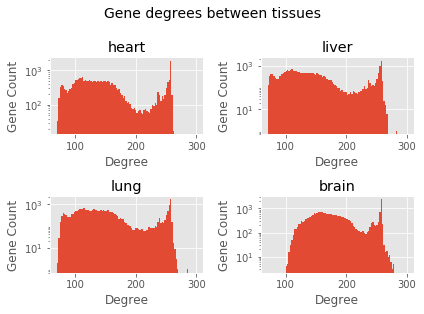

In [13]:
#Making Figure 4
plt.subplot(2,2,1)
d = Dab(base_dir + 'heart.dab')
get_degree_hist(d, title="heart", range=(70,300))

plt.subplot(2,2,2)
d = Dab(base_dir + 'liver.dab')
get_degree_hist(d, title="liver", range=(70,300))

plt.subplot(2,2,3)
d = Dab(base_dir + 'lung.dab')
get_degree_hist(d, title="lung", range=(70,300))

plt.subplot(2,2,4)
d = Dab(base_dir + 'brain.dab')
get_degree_hist(d, title="brain", range=(70,300))

plt.suptitle("Gene degrees between tissues", fontsize=14, y=1.08)
plt.tight_layout()
plt.show()

